# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from pandas.io.parsers import read_csv
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

#read the csv file that abbriviate the class id to a desbrective info 
signnames = read_csv("signnames.csv").values[:, 1]

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file =  "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

#Get some statistics and numbers about the classes and there occurances in the datasets
sign_classes_train, class_indices_train, class_counts_train = np.unique(y_train, return_index = True, return_counts = True)
sign_classes_valid, class_indices_valid, class_counts_valid = np.unique(y_valid, return_index = True, return_counts = True)
sign_classes_test, class_indices_test, class_counts_test = np.unique(y_test, return_index = True, return_counts = True)

# print(sign_classes_train, class_indices_train, class_counts_train)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

4


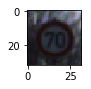

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

### Histogram the datasets

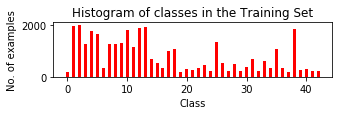

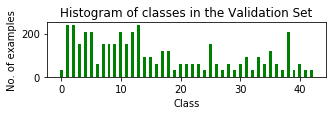

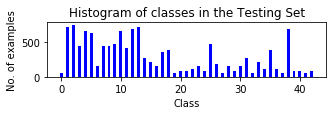

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def Histogram_Dataset(n_classes, class_counts, Dataset_type, color):
    # the histogram of the data
    plt.bar(range(n_classes), class_counts, align="center", width=0.5
            , color=color)
    plt.xlabel('Class')
    plt.ylabel('No. of examples')
    plt.title('Histogram of classes in the {} Set'.format(Dataset_type))
    # Tweak spacing to prevent clipping of ylabel
    
    

# fig, axs = plt.subplots(3, 1, sharex=True)
# fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
fig = plt.figure(figsize = (5, 1))
Histogram_Dataset(n_classes, class_counts_train, 'Training', color = 'r')
fig = plt.figure(figsize = (5, 1))
Histogram_Dataset(n_classes, class_counts_valid, 'Validation', color = 'g')
fig = plt.figure(figsize = (5, 1))
Histogram_Dataset(n_classes, class_counts_test, 'Testing', color = 'b')
plt.show()

### Plot some samples from the training test to get a feeling of how those signs look like

Class 0 : Speed limit (20km/h)                               180 Samples


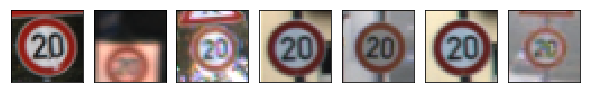


Class 1 : Speed limit (30km/h)                               1980 Samples


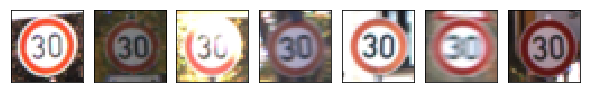


Class 2 : Speed limit (50km/h)                               2010 Samples


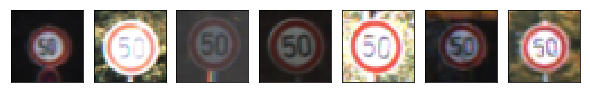


Class 3 : Speed limit (60km/h)                               1260 Samples


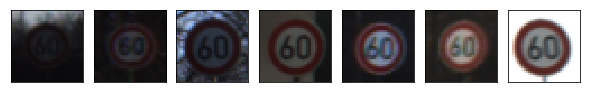


Class 4 : Speed limit (70km/h)                               1770 Samples


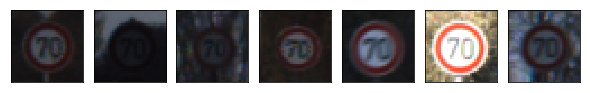


Class 5 : Speed limit (80km/h)                               1650 Samples


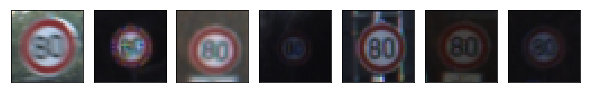


Class 6 : End of speed limit (80km/h)                        360 Samples


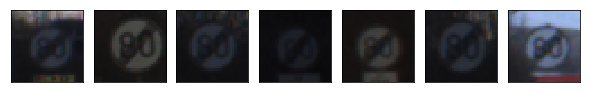


Class 7 : Speed limit (100km/h)                              1290 Samples


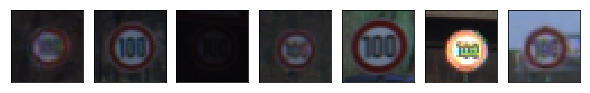


Class 8 : Speed limit (120km/h)                              1260 Samples


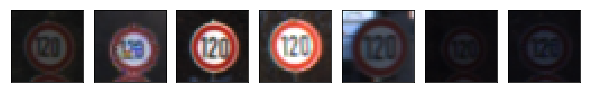


Class 9 : No passing                                         1320 Samples


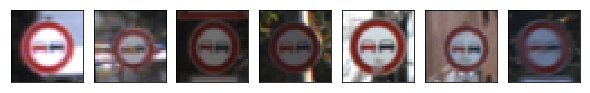


Class 10: No passing for vehicles over 3.5 metric tons       1800 Samples


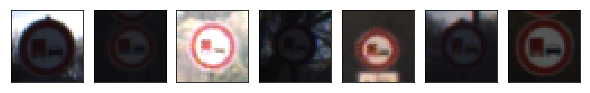


Class 11: Right-of-way at the next intersection              1170 Samples


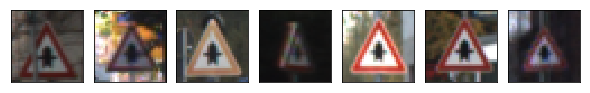


Class 12: Priority road                                      1890 Samples


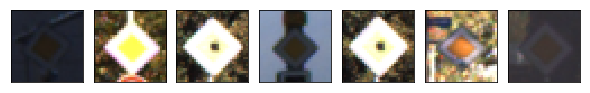


Class 13: Yield                                              1920 Samples


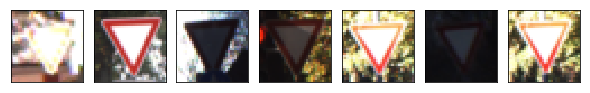


Class 14: Stop                                               690 Samples


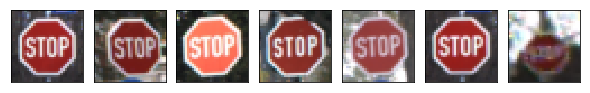


Class 15: No vehicles                                        540 Samples


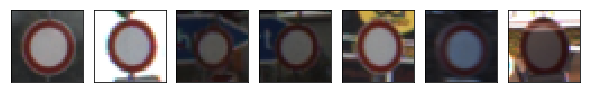


Class 16: Vehicles over 3.5 metric tons prohibited           360 Samples


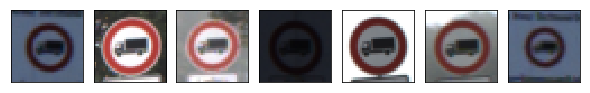


Class 17: No entry                                           990 Samples


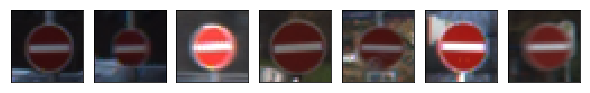


Class 18: General caution                                    1080 Samples


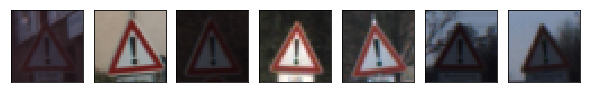


Class 19: Dangerous curve to the left                        180 Samples


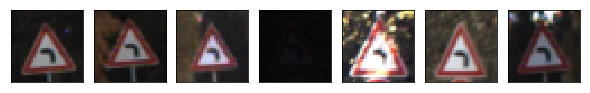


Class 20: Dangerous curve to the right                       300 Samples


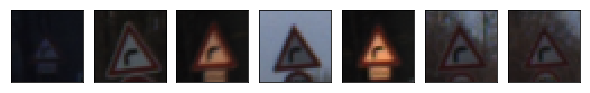


Class 21: Double curve                                       270 Samples


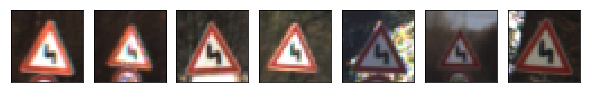


Class 22: Bumpy road                                         330 Samples


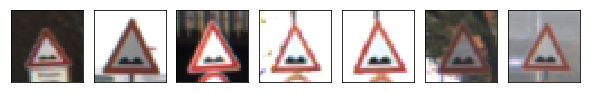


Class 23: Slippery road                                      450 Samples


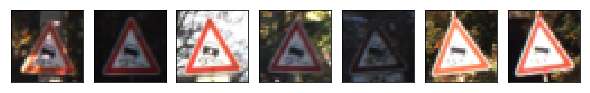


Class 24: Road narrows on the right                          240 Samples


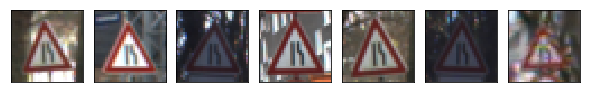


Class 25: Road work                                          1350 Samples


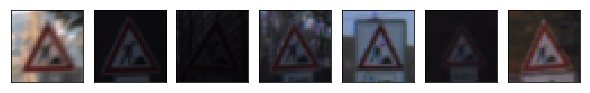


Class 26: Traffic signals                                    540 Samples


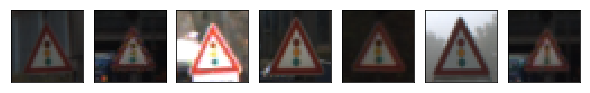


Class 27: Pedestrians                                        210 Samples


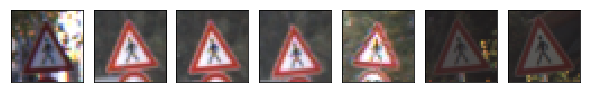


Class 28: Children crossing                                  480 Samples


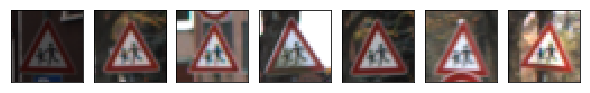


Class 29: Bicycles crossing                                  240 Samples


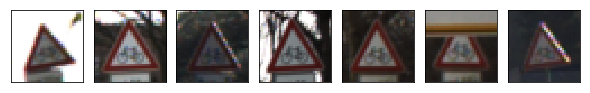


Class 30: Beware of ice/snow                                 390 Samples


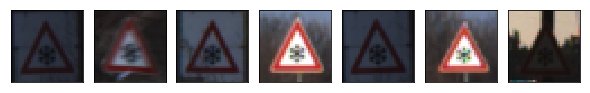


Class 31: Wild animals crossing                              690 Samples


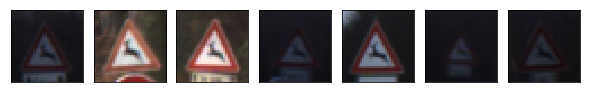


Class 32: End of all speed and passing limits                210 Samples


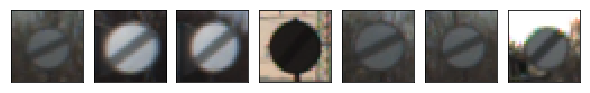


Class 33: Turn right ahead                                   599 Samples


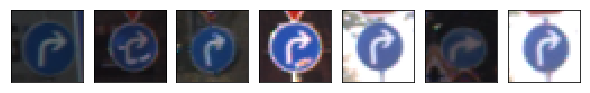


Class 34: Turn left ahead                                    360 Samples


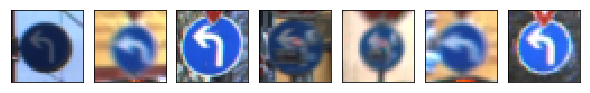


Class 35: Ahead only                                         1080 Samples


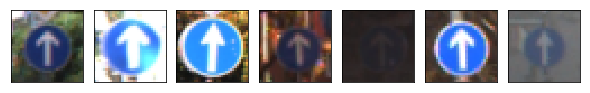


Class 36: Go straight or right                               330 Samples


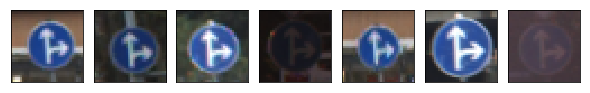


Class 37: Go straight or left                                180 Samples


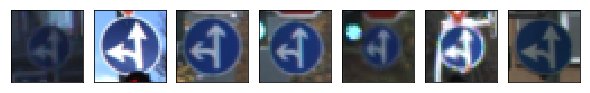


Class 38: Keep right                                         1860 Samples


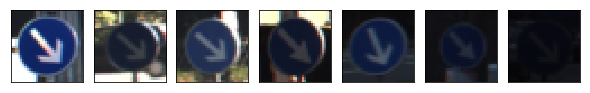


Class 39: Keep left                                          270 Samples


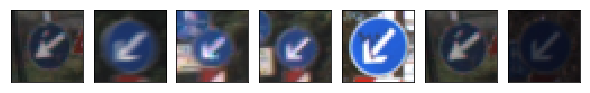


Class 40: Roundabout mandatory                               300 Samples


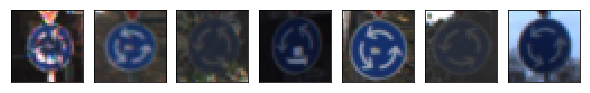


Class 41: End of no passing                                  210 Samples


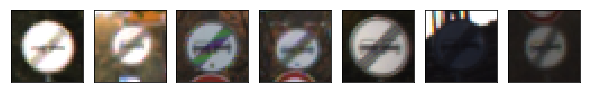


Class 42: End of no passing by vehicles over 3.5 metric tons 210 Samples


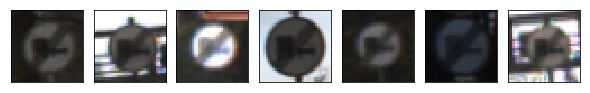

In [5]:
if 1:
    import random

    #for fancy output, find & calculate the widest class label to have a well represented visuals of datasets
    column_width = max(len(name) for name in signnames)

    #loop through Training datasets and plot 7 random data items in it
    for class_id, class_index, class_counts in zip(sign_classes_train, class_indices_train, class_counts_train): 
        print("Class %-*i: %-*s %s Samples" % (2, class_id, column_width, signnames[class_id], str(class_counts)))
        #Creat an array that contains 10 random numbers between 0 and the numbers of sets in the dataset to use later as indices to plot images
        random_indices = random.sample(range(class_index, class_index + class_counts),8)

        #plot 7 random mages from the datasets for each class
        fig=plt.figure(figsize=(8, 1))
        fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
        columns = 7
        rows = 1
        for i in range(1, columns*rows +1):
            img = X_train[random_indices[i]]
            fig.add_subplot(rows, columns, i, xticks=[], yticks=[])
            plt.imshow(img)
        plt.show()
        print("================================================================================\n")


    


distribution of classes in the training, validation and test is not the same, There are more examples of some classes than others. that should be fixed somehow to improve the accurace of the network.

### *******************#######TBD: Probably good to add timing and logger funtions#############

In [6]:
import sys
import time

def get_time_hhmmss(start = None):
    """
    Calculates time since `start` and formats as a string.
    """
    if start is None:
        return time.strftime("%Y/%m/%d %H:%M:%S")
    end = time.time()
    m, s = divmod(end - start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str   

# Print iterations progress
def print_progress(iteration, total):
    """
    Call in a loop to create terminal progress bar
    
    Parameters
    ----------
        
    iteration : 
                Current iteration (Int)
    total     : 
                Total iterations (Int)
    """
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
if 0:
    from sklearn.utils import shuffle
    from skimage import exposure
    import warnings

    def pre_process_ds(X):
        """
        Normalize the image data with Min-Max scaling to a range of [0.0, 1.0]
        :param X: The image data to be processed
        :return: processed dataset in a tuple
        """

        print("Preprocessing dataset with {} examples:".format(X.shape[0]))

        #Convert to grayscale, e.g. single channel Y
        X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
        #Scale features to be in [0, 1]
        X = (X / 255.).astype(np.float32)
        print(X.shape)
        #Histogram Equalization
        for i in range(X.shape[0]):
    #         break
            #DISABLE WARNNING OUTPUT ON THE TERMINAL
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                X[i] = exposure.equalize_adapthist(X[i])
            #USE PROGRESS FUNCTION TO SHOW THE PROGRESS OF PROCESSING THE DATASET
            print_progress(i + 1, X.shape[0])


        #Add 1-layer for Grayscale channel

        X = X.reshape(X.shape + (1,))
        print(X.shape)
        return X

    X_train_processed = pre_process_ds(X_train)
    # X_valid_processed = pre_process_ds(X_valid)



In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2 
        # def preprocess_features(X, equalize_hist=True):

            #     # convert from RGB to YUV
            #     X = np.array([np.expand_dims(cv2.cvtColor(rgb_img, cv2.COLOR_RGB2YUV)[:, :, 0], 2) for rgb_img in X])

            #     X_gray= X

            #     # adjust image contrast
            #     if equalize_hist:
            #         X = np.array([np.expand_dims(cv2.equalizeHist(np.uint8(img)), 2) for img in X])

            #     X = np.float32(X)

            #     # standardize features
            #     X -= np.mean(X, axis=0)
            #     X /= (np.std(X, axis=0) + np.finfo('float32').eps)
#             return X
    
def grayscale(image):
    return cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))[0]


def equalize(image):
    return cv2.equalizeHist(np.uint8(image))


def normalize_im(image):
    mini, maxi = np.min(image), np.max(image)
    return (image - mini) / (maxi - mini) * 2 - 1


def preprocess_im(image):
    return np.expand_dims(normalize_im(equalize(grayscale(image))), axis=2)


def preprocess_features(dataset):
    return np.array([preprocess_im(im) for im in dataset])





X_train_norm = preprocess_features(X_train)
X_test_norm = preprocess_features(X_test)
X_valid_norm = preprocess_features(X_valid)
print(np.shape(X_train))
print(np.shape(X_train_norm))
print("Done")

(34799, 32, 32, 3)
(34799, 32, 32, 1)
Done


### Include an exploratory visualization example of the grayscaled dataset

14291
38


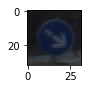

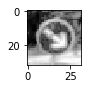

In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
print(index)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

image = X_train_norm[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, "gray")

print(y_train[index])

### Signs augmantation (transform, rotate and projection)

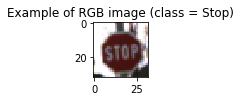

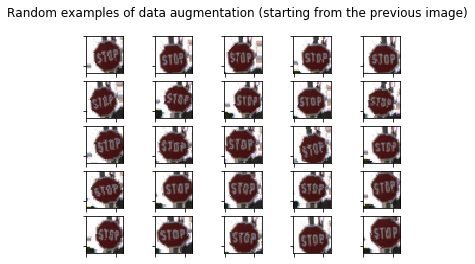

In [40]:
from keras.preprocessing.image import ImageDataGenerator
import cv2 


# perform online data augmentation to generate new training data
image_generation = ImageDataGenerator(rotation_range=12.,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

# take a random image from the training set
index = random.randint(0, len(X_train))
img_rgb = X_train[index]
# img_rgb = X_train_processed[400]
# print(img_rgb.shape)
# img_rgb = cv2.cvtColor(img_rgb,cv2.COLOR_GRAY2RGB)
img_rgb = img_rgb
# img_rgb = np.dstack((img_rgb, img_rgb, img_rgb))
# print(img_rgb)
# print(img_rgb.shape)
# plot the original image
plt.figure(figsize=(1,1))
plt.imshow(img_rgb)
plt.title('Example of RGB image (class = {})'.format(str(signnames[y_train[index]])))
plt.show()


# img_rgb = img_rgb.reshape(32, 32)
# img_rgb = np.flip(img_rgb, 1)
# img_rgb = img_rgb[-1::-1]

# plot some randomly augmented images generated using keras "ImageDataGenerator"
rows, cols = 5, 5
fig, ax_array = plt.subplots(rows, cols)
for ax in ax_array.ravel():
    augmented_img, _ = image_generation.flow(np.expand_dims(img_rgb, 0), y_train[0:1]).next()
    ax.imshow(np.uint8(np.squeeze(augmented_img)))
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.suptitle('Random examples of data augmentation (starting from the previous image)')
plt.show()



# Shuffle the training data.
``You do not need to modify this section.

In [ ]:
from sklearn.utils import shuffle

X_train_norm, y_train = shuffle(X_train_norm, y_train)

### Model Architecture
![2-stage ConvNet architecture](2_stage_ConvNet_architecture.jpg)
Source: Yan LeCun

In [11]:
# Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True



#0	1	1	2	3	5	8	13	21	34	55	89	144	233	377	
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=[3, 3, 1, 55], mean=0.0, stddev=0.05)),
    'wc2': tf.Variable(tf.truncated_normal(shape=[3, 3, 55, 89], mean=0.0, stddev=0.05)),
    'wc3': tf.Variable(tf.truncated_normal(shape=[3, 3, 89, 144], mean=0.0, stddev=0.05)),
    'wc4': tf.Variable(tf.truncated_normal(shape=[3, 3, 144, 89], mean=0.0, stddev=0.05)), #89 was 233
    'wc5': tf.Variable(tf.truncated_normal(shape=[3, 3, 89, 55], mean=0.0, stddev=0.05)), #55 was 377
    'wd1': tf.Variable(tf.truncated_normal(shape=[50], mean=0.0, stddev=0.05)),
    'out': tf.Variable(tf.truncated_normal(shape=[50, n_classes], mean=0.0, stddev=0.05))}



biases = {
    'bc1': tf.Variable(tf.constant(0.05, shape=[55])),
    'bc2': tf.Variable(tf.constant(0.05, shape=[89])),
    'bc3': tf.Variable(tf.constant(0.05, shape=[144])),
    'bc4': tf.Variable(tf.constant(0.05, shape=[89])), #89 was 233
    'bc5': tf.Variable(tf.constant(0.05, shape=[55])),  #55 was 377
    'bd1': tf.Variable(tf.constant(0.05, shape=[50])),
    'out': tf.Variable(tf.constant(0.05, shape=[n_classes]))}

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def dropouts(input_layer, dropout):
    drop = tf.nn.dropout(input_layer, dropout)
    return drop

def init_W(shape, mu=0, sigma=0.1):
    return tf.Variable(tf.truncated_normal(shape, mean = mu, stddev = sigma))

def init_B(shape, start_val=0.1):
    initialization = tf.constant(start_val, shape=shape)
    return tf.Variable(initialization)


def OBNet(x, weights, biases, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #conv# = conv2d(x, W, b, strides=1)
    #drop# = dropout(input_layer, dropout)
    #maxpool2d = maxpool2d(x, k=2)
    #0	1	1	2	3	5	8	13	21	34	55	89	144	233	377	
    ################1st Stage######################
    # Layer 1: Convolutional. Input = 32x32x1. Output = 16x16x55.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    max1 = maxpool2d(conv1, k=2)
    drop1 = dropouts(max1, dropout=keep_prob)
    ################2nd Stage######################
    # Layer 2: Convolutional. Input = 16x16x55. Output = 8x8x89.
    conv2 = conv2d(drop1, weights['wc2'], biases['bc2'])
    max2 = maxpool2d(conv2, k=2)
    drop2 = dropouts(max2, dropout=keep_prob)
    ################3rd Stage######################
    # Layer 3: Convolutional. Input = 8x8x89. Output = 4x4x144.
    conv3 = conv2d(drop2, weights['wc3'], biases['bc3'])
    max3 = maxpool2d(conv3, k=2)
    drop3 = dropouts(max3, dropout=keep_prob)
    ################4th Stage######################
    # Layer 4: Convolutional. Input = 4x4x144. Output = 2x2x89.
    conv4 = conv2d(drop3, weights['wc4'], biases['bc4'])
    max4 = maxpool2d(conv4, k=2)
    drop4 = dropouts(max4, dropout=keep_prob)
    ################5th Stage######################
    # Layer 5: Convolutional. Input = 2x2x89. Output = 1x1x55.
    conv5 = conv2d(drop4, weights['wc5'], biases['bc5'])
    max5 = maxpool2d(conv5, k=2)
    drop5 = dropouts(max5, dropout=keep_prob)
    ################6th Stage######################
    # Layer 6: Fully Connected. Input = 1x1x377. Output = 1024.
    fc0 = tf.concat([flatten(drop1), flatten(drop2), flatten(drop3), flatten(drop4), flatten(drop5)], 1)
    fc1_W = init_W(shape=(fc0._shape[1].value, 50))
    fc1_B = tf.Variable(tf.constant(0.1, shape=[fc0._shape[1].value]))
    fc1 = tf.matmul(fc0, fc1_W) + biases['bd1']
    drop6 = dropouts(fc1, dropout=keep_prob)
    #################output#######################  
    logits = tf.matmul(drop6, weights['out']) + biases['out'] 
    
    
    # Create a Network parameter dict for visualization
    global network_params
    network_params = {
        "conv1": conv1,
        "conv2": conv2,
        "conv3": conv3,
        "conv4": conv4,
        "conv5": conv5,
        "fc0": fc0,
        "fc1": fc1,
        "logits": logits
    }
                       
    return logits, conv1, conv2, conv3, conv4, conv5

In [12]:
x = tf.placeholder( tf.float32, (None, 32, 32, 1),name="x")
y = tf.placeholder(tf.int32, (None), name="y")
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

In [13]:
rate = 0.001

logits, conv1, conv2, conv3, conv4, conv5 = OBNet(x, weights, biases, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss=loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
import math    

def evaluate(X_data, y_data):
    print("Evaluating...")
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        if num_examples > BATCH_SIZE:
            print_progress(offset, math.floor(num_examples/BATCH_SIZE)*BATCH_SIZE)
    return total_accuracy / num_examples

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

In [15]:
# training hyperparameters
EPOCHS = 9
BATCH_SIZE = 128
BATCHES_PER_EPOCH = 5000
modelname = 'obnet'

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
#use an array to save the progress of the training  and validation accuracy
acc_array = []

with tf.Session() as sess:
    #Now when creating your session pass this config to it.
#     sess = tf.Session(config=config)

    sess.run(tf.global_variables_initializer())
#     num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for epoch in range(EPOCHS):
#         X_train, y_train = shuffle(X_train, y_train)
        print("EPOCH {} ...".format(epoch + 1))

        batch_counter = 0
        for batch_x, batch_y in image_generation.flow(X_train_norm, y_train, batch_size=BATCH_SIZE):

            batch_counter += 1
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            print_progress(batch_counter, BATCHES_PER_EPOCH)
            if batch_counter == BATCHES_PER_EPOCH:
                break
            
        train_accuracy = evaluate(X_train_norm, y_train)    
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        
        acc_array.append([train_accuracy, validation_accuracy])

        print("EPOCH {} ...".format(epoch+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        saver.save(sess, 'obnet')
        print("Model saved")


Training...

EPOCH 1 ...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Evaluating...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Evaluating...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
EPOCH 1 ...
Train Accuracy Accuracy = 0.989
Validation Accuracy = 0.962
Model saved
EPOCH 2 ...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Evaluating...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Evaluating...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
EPOCH 2 ...
Train Accuracy Accuracy = 0.996
Validation Accuracy = 0.976
Model saved
EPOCH 3 ...
 |███████████████████████████████████████████████████████████████████████

## Evaluate the training and validation history

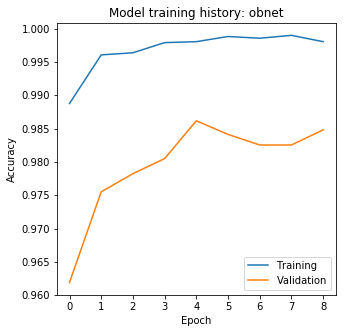

In [17]:
def plot_accuracy(acc_array, modelname):
    plt.figure(figsize=[5,5])
    plt.title('Model training history: {}'.format(modelname))
    plt.plot(acc_array)
    plt.legend(['Training', 'Validation'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy(acc_array, 'obnet')

## Testing the Model

Test the model on untouched dataset

In [18]:
# testing the model
with tf.Session() as sess:
    #Load saved model from previoud cell
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #Pass the testing dataset to the model and evaluate
    test_accuracy = evaluate(X_test_norm, y_test)
    print('Performance on test set: {:.3f}'.format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./obnet
Evaluating...
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Performance on test set: 0.966


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import PIL
import os
from PIL import Image

#create an array to fit all of the 5 images
new_image_test_data = np.empty([5, 32, 32, 3])
new_image_test_labels = (43, 43, 1, 20, 43)
test_img_dir = 'new_signs'  # locate the directory of the targeted images
# loop throug specific type/name of files in the selected directory
i=0

test_images_dir = ('new_signs/1.jpg',
                   'new_signs/2.jpg',
                   'new_signs/3.jpg',
                   'new_signs/4.jpg',
                   'new_signs/5.jpg')

for i in range(0, len(test_images_dir)):
    img = Image.open(test_images_dir[i]);
    new_image_test_data[i] = img.resize((32,32))
    
new_image_test_array = preprocess_features(np.float32(new_image_test_data))


### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./obnet
Evaluating...
Performance on new images set: 0.400

Classification Result



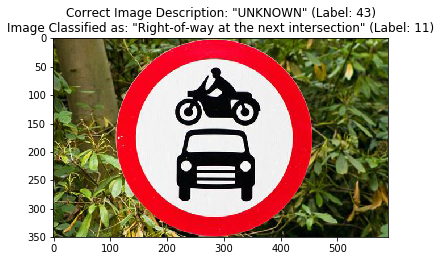

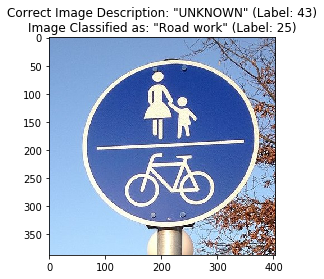

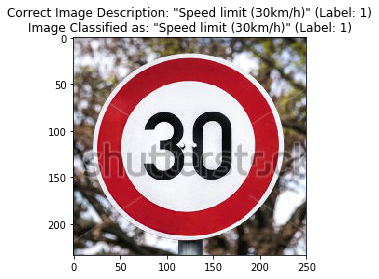

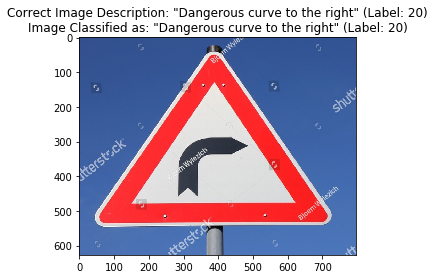

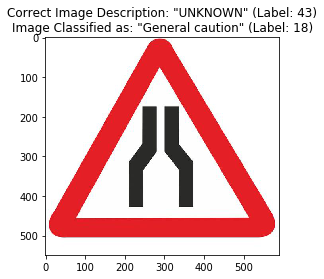

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    #Load saved model from previoud cell
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    #Pass the testing dataset to the model and evaluate
    test_accuracy = evaluate(new_image_test_array, new_image_test_labels)
    print('Performance on new images set: {:.3f}'.format(test_accuracy))

    softmax_results = tf.nn.softmax(logits)
    softmax_results = sess.run(softmax_results, feed_dict={x: new_image_test_array, keep_prob:1})
    classification_label = tf.argmax(softmax_results, 1)
    classification_label = sess.run(classification_label)
    print("\nClassification Result\n")
    for i in range(0, len(test_images_dir)):
        test_label_desc = signnames[(new_image_test_labels[i])]
        img = Image.open(test_images_dir[i]);
        plt.figure(i)
        plt.imshow(img)
        correct_img = 'Correct Image Description: "' + test_label_desc + '" (Label: ' + str(new_image_test_labels[i]) + ')'
        classified_img = '\nImage Classified as: "' + signnames[classification_label[i]] + '" (Label: ' + str(classification_label[i]) + ')'
        plt.title(correct_img + classified_img)

### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    #Load saved model from previoud cell
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    softmax_results = tf.nn.softmax(logits)
    softmax_results = sess.run(softmax_results, feed_dict={x: new_image_test_array, keep_prob:1})
    classification_label = tf.argmax(softmax_results, 1)
    classification_label = sess.run(classification_label)
    top_5 = sess.run(tf.nn.top_k(softmax_results, k=5))
    
top_5

INFO:tensorflow:Restoring parameters from ./obnet


TopKV2(values=array([[  9.41752434e-01,   5.07599749e-02,   5.67284878e-03,
          8.28838907e-04,   2.89341871e-04],
       [  6.43326700e-01,   2.04405591e-01,   1.33099422e-01,
          3.21466755e-03,   3.07182339e-03],
       [  9.99999285e-01,   6.56961561e-07,   4.97985617e-08,
          4.53239473e-08,   4.96465091e-09],
       [  9.99999642e-01,   3.65144160e-07,   1.27237720e-10,
          7.59404258e-12,   7.33098911e-12],
       [  9.99908566e-01,   8.88587529e-05,   2.13025078e-06,
          2.24513954e-07,   1.90187052e-07]], dtype=float32), indices=array([[11, 21, 40, 30, 31],
       [25, 12, 30, 21, 11],
       [ 1,  2,  0,  5,  7],
       [20, 23, 19, 11, 41],
       [18, 27, 11, 24, 26]], dtype=int32))

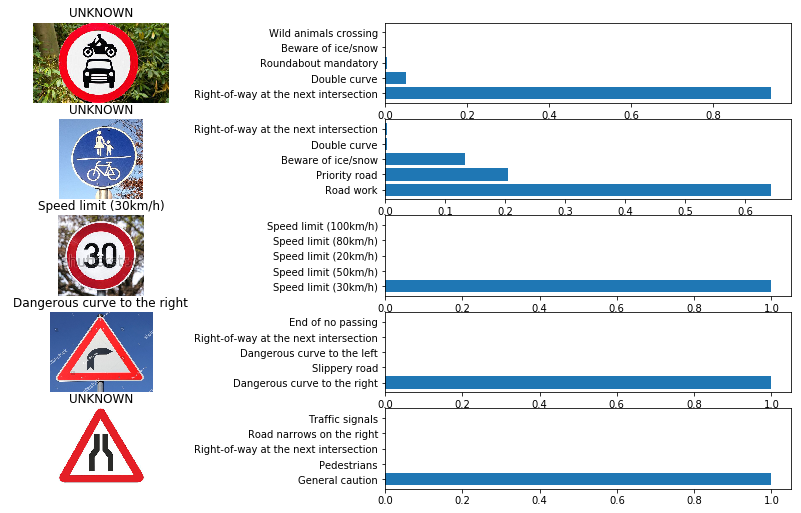

In [23]:
plt.figure(figsize=(16, 21))
for i in range(5):
    plt.subplot(12, 2, 2*i+1)
    img = Image.open(test_images_dir[i]);
    plt.imshow(img) 
    plt.title(signnames[(new_image_test_labels[i])])
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top_5.values[i, :])
    labs=[signnames[j] for j in top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(18,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./obnet
------conv1------


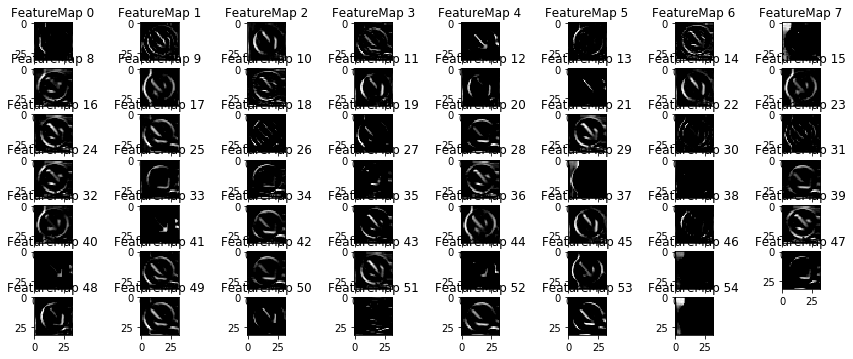

-------------
------conv2------


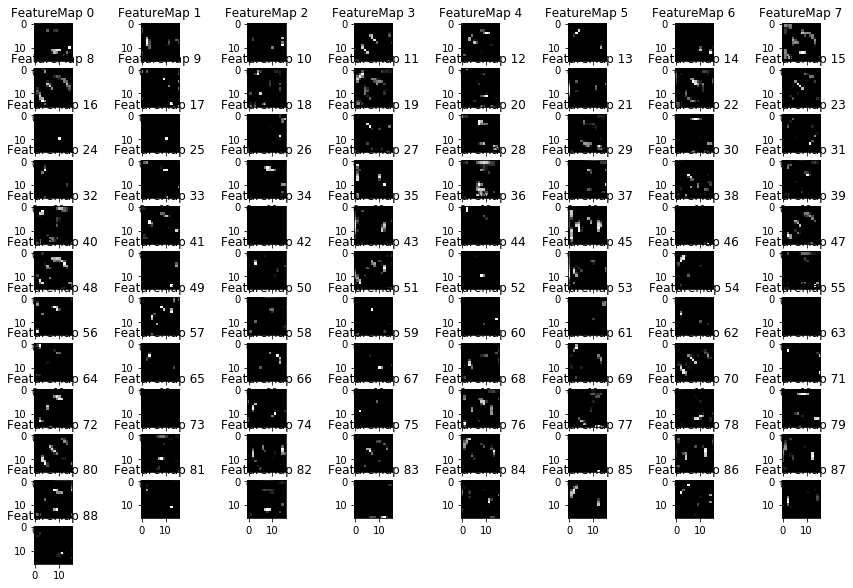

-------------
------conv3------


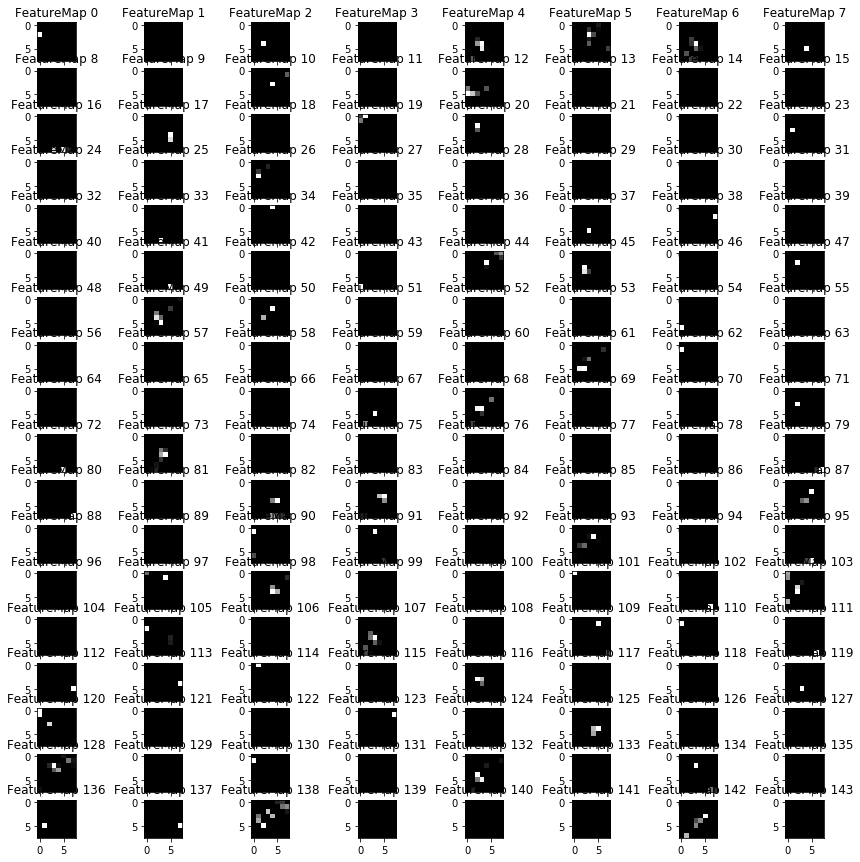

-------------
------conv4------


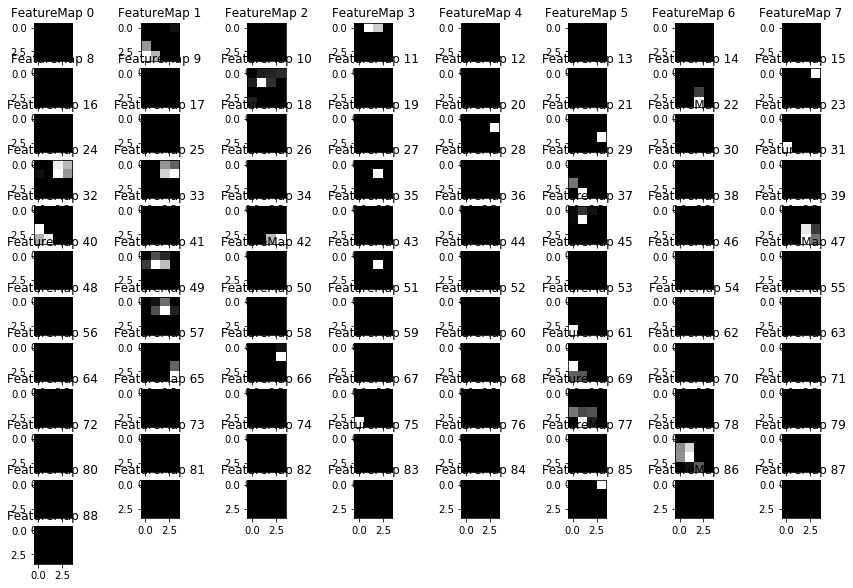

-------------
------conv5------


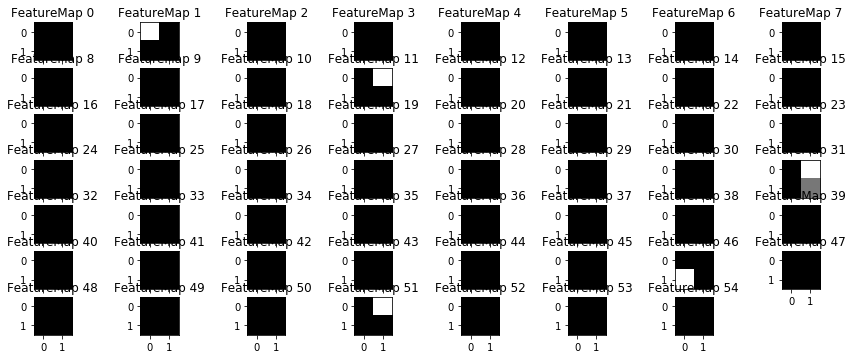

-------------


In [25]:
# testing the model
with tf.Session() as sess:

    # restore saved session with highest validation accuracy
    new_saver = tf.train.import_meta_graph('obnet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('------conv1------')
    plt.figure
    outputFeatureMap(np.expand_dims(X_test_norm[5], axis=0), conv1, activation_min=-1, activation_max=-1 ,plt_num=1)
    plt.show()
    print('-------------')
    
    print('------conv2------')
    plt.figure
    outputFeatureMap(np.expand_dims(X_test_norm[5], axis=0), conv2, activation_min=-1, activation_max=-1 ,plt_num=2)
    plt.show()
    print('-------------')
    print('------conv3------')
    plt.figure
    outputFeatureMap(np.expand_dims(X_test_norm[5], axis=0), conv3, activation_min=-1, activation_max=-1 ,plt_num=3)
    plt.show()
    print('-------------')
    print('------conv4------')
    plt.figure
    outputFeatureMap(np.expand_dims(X_test_norm[5], axis=0), conv4, activation_min=-1, activation_max=-1 ,plt_num=4)
    plt.show()
    print('-------------')
    print('------conv5------')
    plt.figure
    outputFeatureMap(np.expand_dims(X_test_norm[5], axis=0), conv5, activation_min=-1, activation_max=-1 ,plt_num=5)
    plt.show()
    print('-------------')

